In [1]:
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# read csv files
airlines = pd.read_csv('airlines.csv')
flights = pd.read_csv('flights.csv')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
#convert date column to pandas datetime
flights['date'] = pd.to_datetime(flights[['YEAR', 'MONTH', 'DAY']])

In [4]:
#remove unnecessary columns
remove_column = ['TAIL_NUMBER', 'DIVERTED', 'CANCELLATION_REASON', 'DAY', 'MONTH', 'YEAR', 'LATE_AIRCRAFT_DELAY', 'TAXI_OUT', 'TAXI_IN', 'WHEELS_OFF', 'WHEELS_ON', 'AIR_SYSTEM_DELAY', 'FLIGHT_NUMBER', 'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME', 'SECURITY_DELAY', 'AIRLINE_DELAY', 'WEATHER_DELAY']
flights.drop(remove_column, axis = 1, inplace = True)
flights.columns

Index(['DAY_OF_WEEK', 'AIRLINE', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'DEPARTURE_DELAY', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME',
       'DISTANCE', 'ARRIVAL_DELAY', 'CANCELLED', 'date'],
      dtype='object')

In [5]:
#merge airlines list with flights df
airline_names = dict(zip(airlines['IATA_CODE'],airlines['AIRLINE']))
flights['airline_name'] = flights['AIRLINE'].apply(lambda x: airline_names[x])
flights.drop('AIRLINE', axis=1, inplace=True)
flights = flights[['DAY_OF_WEEK', 'date', 'airline_name', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'DEPARTURE_DELAY', 'ARRIVAL_DELAY', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'CANCELLED']]

In [6]:
#add days of weeks column to make dow more user friendly
days = {7:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}
flights['day']=flights['DAY_OF_WEEK'].apply(lambda a:days[a])

In [7]:
# drop number day of week column
flights.drop('DAY_OF_WEEK', axis=1, inplace=True)
flights.columns

Index(['date', 'airline_name', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'DEPARTURE_DELAY', 'ARRIVAL_DELAY', 'SCHEDULED_TIME', 'ELAPSED_TIME',
       'AIR_TIME', 'DISTANCE', 'CANCELLED', 'day'],
      dtype='object')

In [8]:
#reorg df
flights = flights[['day', 'date', 'airline_name', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'DEPARTURE_DELAY', 'ARRIVAL_DELAY', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'CANCELLED']]
flights[:10]

,day,date,airline_name,ORIGIN_AIRPORT,DESTINATION_AIRPORT,DEPARTURE_DELAY,ARRIVAL_DELAY,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,CANCELLED
0,Friday,2015-01-01,Alaska Airlines Inc.,ANC,SEA,-11.0,-22.0,205.0,194.0,169.0,1448,0
1,Friday,2015-01-01,American Airlines Inc.,LAX,PBI,-8.0,-9.0,280.0,279.0,263.0,2330,0
2,Friday,2015-01-01,US Airways Inc.,SFO,CLT,-2.0,5.0,286.0,293.0,266.0,2296,0
3,Friday,2015-01-01,American Airlines Inc.,LAX,MIA,-5.0,-9.0,285.0,281.0,258.0,2342,0
4,Friday,2015-01-01,Alaska Airlines Inc.,SEA,ANC,-1.0,-21.0,235.0,215.0,199.0,1448,0
5,Friday,2015-01-01,Delta Air Lines Inc.,SFO,MSP,-5.0,8.0,217.0,230.0,206.0,1589,0
6,Friday,2015-01-01,Spirit Air Lines,LAS,MSP,-6.0,-17.0,181.0,170.0,154.0,1299,0
7,Friday,2015-01-01,US Airways Inc.,LAX,CLT,14.0,-10.0,273.0,249.0,228.0,2125,0
8,Friday,2015-01-01,American Airlines Inc.,SFO,DFW,-11.0,-13.0,195.0,193.0,173.0,1464,0
9,Friday,2015-01-01,Delta Air Lines Inc.,LAS,ATL,3.0,-15.0,221.0,203.0,186.0,1747,0


In [9]:
flights.CANCELLED.value_counts()

0    5729195
1      89884
Name: CANCELLED, dtype: int64

In [10]:
######### 1st Ranking#############

In [11]:
#get total number of scheduled flights for each airline
rank_flights1 = pd.DataFrame(flights.groupby('airline_name').count()['SCHEDULED_TIME'])
rank_flights1.head()


,SCHEDULED_TIME
airline_name,
Alaska Airlines Inc.,172521
American Airlines Inc.,725984
American Eagle Airlines Inc.,294632
Atlantic Southeast Airlines,571977
Delta Air Lines Inc.,875881


In [12]:
#get total number of cancelled flights for each airline
rank_flights1['CANCELLED']=flights.groupby('airline_name').sum()['CANCELLED']
rank_flights1.head()

,SCHEDULED_TIME,CANCELLED
airline_name,,
Alaska Airlines Inc.,172521,669
American Airlines Inc.,725984,10919
American Eagle Airlines Inc.,294632,15025
Atlantic Southeast Airlines,571977,15231
Delta Air Lines Inc.,875881,3824


In [13]:
#find total number of actual flights by subtracting cancelled flights from scheduled flights
rank_flights1['flown']=rank_flights1['SCHEDULED_TIME']-rank_flights1['CANCELLED']
rank_flights1.head()

,SCHEDULED_TIME,CANCELLED,flown
airline_name,,,
Alaska Airlines Inc.,172521,669,171852
American Airlines Inc.,725984,10919,715065
American Eagle Airlines Inc.,294632,15025,279607
Atlantic Southeast Airlines,571977,15231,556746
Delta Air Lines Inc.,875881,3824,872057


In [14]:
#get percentage of flown rate by dividing flown from scheduled  
rank_flights1['flown_percentage']=rank_flights1['flown']/rank_flights1['SCHEDULED_TIME']*100
rank_flights1.tail()

,SCHEDULED_TIME,CANCELLED,flown,flown_percentage
airline_name,,,,
Southwest Airlines Co.,1261855,16043,1245812,98.728618
Spirit Air Lines,117373,2004,115369,98.292623
US Airways Inc.,198715,4067,194648,97.953350
United Air Lines Inc.,515723,6573,509150,98.725479
Virgin America,61903,534,61369,99.137360


In [15]:
#sort airlines based on flown percentage in ascending order
rank_flights1.sort_values(['flown_percentage'], ascending=True)

,SCHEDULED_TIME,CANCELLED,flown,flown_percentage
airline_name,,,,
American Eagle Airlines Inc.,294632,15025,279607,94.900418
Atlantic Southeast Airlines,571977,15231,556746,97.337131
US Airways Inc.,198715,4067,194648,97.953350
Spirit Air Lines,117373,2004,115369,98.292623
Skywest Airlines Inc.,588353,9960,578393,98.307139
JetBlue Airways,267048,4276,262772,98.398790
American Airlines Inc.,725984,10919,715065,98.495972
United Air Lines Inc.,515723,6573,509150,98.725479
Southwest Airlines Co.,1261855,16043,1245812,98.728618


Text(0.5,1,'flown percentage for each airline')

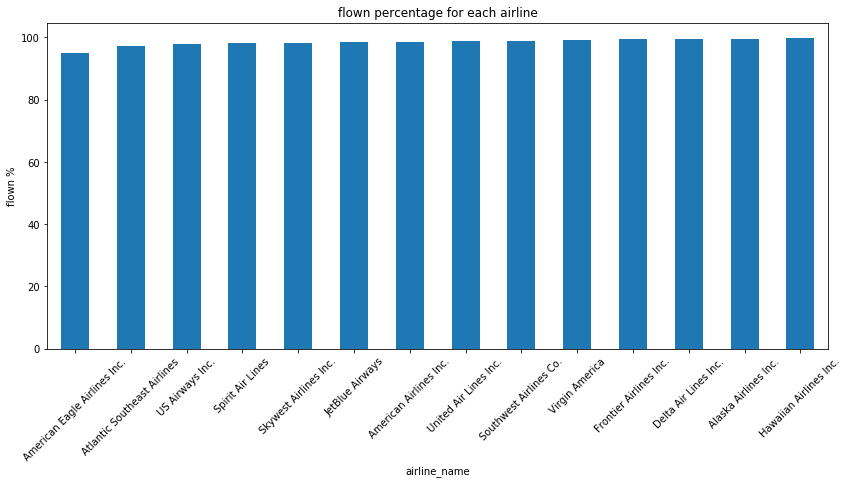

In [16]:
#graph airlines according to flown percentage
rank_flights1.sort_values(['flown_percentage'],ascending = 1,inplace=True)
rank_flights1['flown_percentage'].plot(kind='bar',figsize=(14,6),rot=45)
plt.ylabel('flown %')
plt.title('flown percentage for each airline')

In [17]:
#assign scoring rank for 'flown percentage' and drop other columns
drop_column1 = ['SCHEDULED_TIME', 'CANCELLED', 'flown', 'flown_percentage']
rank_flights1.drop(drop_column1, axis = 1, inplace = True)


In [18]:
rank_flights1.insert(0, 'flown_score', range(1, 15))
rank_flights1

,flown_score
airline_name,
American Eagle Airlines Inc.,1
Atlantic Southeast Airlines,2
US Airways Inc.,3
Spirit Air Lines,4
Skywest Airlines Inc.,5
JetBlue Airways,6
American Airlines Inc.,7
United Air Lines Inc.,8
Southwest Airlines Co.,9


In [19]:
######### 2nd Ranking#############

In [20]:
#create column for all delayed flighs over 1 min
flights['over_1min'] = np.where(flights['ARRIVAL_DELAY']>=1, 1, 0)
flights[:10]

,day,date,airline_name,ORIGIN_AIRPORT,DESTINATION_AIRPORT,DEPARTURE_DELAY,ARRIVAL_DELAY,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,CANCELLED,over_1min
0,Friday,2015-01-01,Alaska Airlines Inc.,ANC,SEA,-11.0,-22.0,205.0,194.0,169.0,1448,0,0
1,Friday,2015-01-01,American Airlines Inc.,LAX,PBI,-8.0,-9.0,280.0,279.0,263.0,2330,0,0
2,Friday,2015-01-01,US Airways Inc.,SFO,CLT,-2.0,5.0,286.0,293.0,266.0,2296,0,1
3,Friday,2015-01-01,American Airlines Inc.,LAX,MIA,-5.0,-9.0,285.0,281.0,258.0,2342,0,0
4,Friday,2015-01-01,Alaska Airlines Inc.,SEA,ANC,-1.0,-21.0,235.0,215.0,199.0,1448,0,0
5,Friday,2015-01-01,Delta Air Lines Inc.,SFO,MSP,-5.0,8.0,217.0,230.0,206.0,1589,0,1
6,Friday,2015-01-01,Spirit Air Lines,LAS,MSP,-6.0,-17.0,181.0,170.0,154.0,1299,0,0
7,Friday,2015-01-01,US Airways Inc.,LAX,CLT,14.0,-10.0,273.0,249.0,228.0,2125,0,0
8,Friday,2015-01-01,American Airlines Inc.,SFO,DFW,-11.0,-13.0,195.0,193.0,173.0,1464,0,0
9,Friday,2015-01-01,Delta Air Lines Inc.,LAS,ATL,3.0,-15.0,221.0,203.0,186.0,1747,0,0


In [21]:
#get total number of scheduled flights for each airline
rank_flights2 = pd.DataFrame(flights.groupby('airline_name').count()['SCHEDULED_TIME'])
rank_flights2.head()

,SCHEDULED_TIME
airline_name,
Alaska Airlines Inc.,172521
American Airlines Inc.,725984
American Eagle Airlines Inc.,294632
Atlantic Southeast Airlines,571977
Delta Air Lines Inc.,875881


In [22]:
#get delayed ratio
rank_flights2['delayed']=flights.groupby('airline_name').sum()['over_1min']
rank_flights2.head()

,SCHEDULED_TIME,delayed
airline_name,,
Alaska Airlines Inc.,172521,56953
American Airlines Inc.,725984,252191
American Eagle Airlines Inc.,294632,103505
Atlantic Southeast Airlines,571977,213217
Delta Air Lines Inc.,875881,250840


In [23]:
#get delayed percentage
rank_flights2['delayed_percentage']=rank_flights2['delayed']/rank_flights2['SCHEDULED_TIME']*100
rank_flights2

,SCHEDULED_TIME,delayed,delayed_percentage
airline_name,,,
Alaska Airlines Inc.,172521,56953,33.012213
American Airlines Inc.,725984,252191,34.737818
American Eagle Airlines Inc.,294632,103505,35.130264
Atlantic Southeast Airlines,571977,213217,37.277198
Delta Air Lines Inc.,875881,250840,28.638594
Frontier Airlines Inc.,90836,41232,45.391695
Hawaiian Airlines Inc.,76272,30179,39.567600
JetBlue Airways,267048,101998,38.194632
Skywest Airlines Inc.,588353,222435,37.806385


In [24]:
rank_flights2.sort_values(['delayed_percentage'], ascending=True)

,SCHEDULED_TIME,delayed,delayed_percentage
airline_name,,,
Delta Air Lines Inc.,875881,250840,28.638594
Alaska Airlines Inc.,172521,56953,33.012213
American Airlines Inc.,725984,252191,34.737818
American Eagle Airlines Inc.,294632,103505,35.130264
United Air Lines Inc.,515723,186227,36.109888
Atlantic Southeast Airlines,571977,213217,37.277198
Southwest Airlines Co.,1261855,470767,37.307535
Skywest Airlines Inc.,588353,222435,37.806385
JetBlue Airways,267048,101998,38.194632


Text(0.5,1,'delayed percentage for each airline')

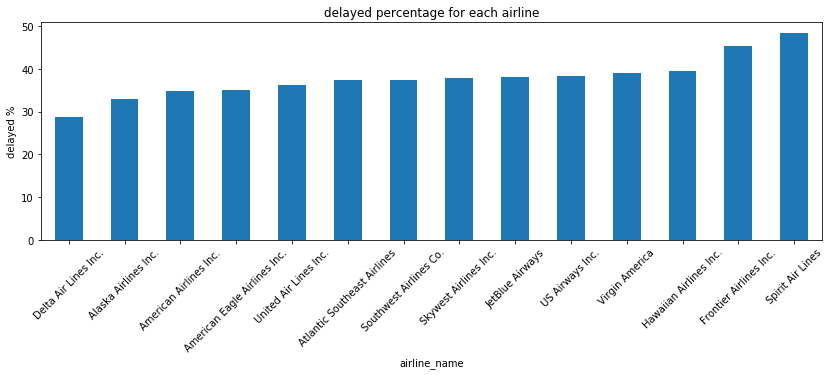

In [37]:
#graph airlines according to delayed percentage
rank_flights2.sort_values(['delayed_percentage'],ascending = 1,inplace=True)
#rank_flights2['delayed_percentage'].plot(kind='bar',figsize=(14,6),rot=45)
rank_flights2['delayed_percentage'].plot(kind='bar',figsize=(14,4),rot=45)
plt.ylabel('delayed %')
plt.title('delayed percentage for each airline')

In [26]:
#assign scoring rank for 'delayed_percentage' and drop other columns
drop_column2 = ['SCHEDULED_TIME', 'delayed', 'delayed_percentage']
rank_flights2.drop(drop_column2, axis = 1, inplace = True)

In [75]:
#insert score ranking based on positon
rank_flights2.insert(0, 'delayed_percentage_score', range(14, 0, -1))
rank_flights2

,delayed_percentage_score
airline_name,
Delta Air Lines Inc.,14
Alaska Airlines Inc.,13
American Airlines Inc.,12
American Eagle Airlines Inc.,11
United Air Lines Inc.,10
Atlantic Southeast Airlines,9
Southwest Airlines Co.,8
Skywest Airlines Inc.,7
JetBlue Airways,6


In [76]:
######### 3rd Ranking#############

In [77]:
rank_flights3 = pd.DataFrame(flights.groupby('airline_name').mean()['ARRIVAL_DELAY'])
rank_flights3.sort_values(['ARRIVAL_DELAY'], ascending=True)

,ARRIVAL_DELAY
airline_name,
Alaska Airlines Inc.,-0.976563
Delta Air Lines Inc.,0.186754
Hawaiian Airlines Inc.,2.023093
American Airlines Inc.,3.451372
US Airways Inc.,3.706209
Southwest Airlines Co.,4.374964
Virgin America,4.737706
United Air Lines Inc.,5.431594
Skywest Airlines Inc.,5.845652


Text(0.5,1,'mean arrival delay in minutes for each airline')

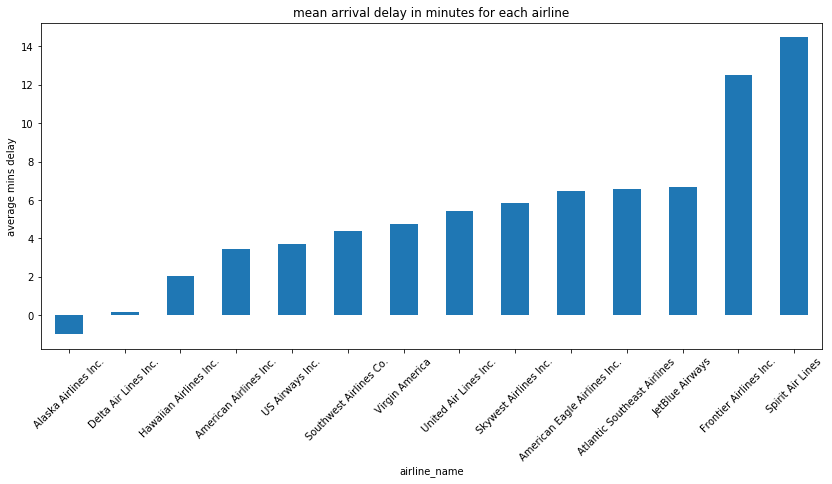

In [78]:
#graph airlines according to delayed percentage
rank_flights3.sort_values(['ARRIVAL_DELAY'],ascending = 1,inplace=True)
rank_flights3['ARRIVAL_DELAY'].plot(kind='bar',figsize=(14,6),rot=45)
plt.ylabel('average mins delay')
plt.title('mean arrival delay in minutes for each airline')

In [79]:
rank_flights3.sort_values(['ARRIVAL_DELAY'], ascending=True)

,ARRIVAL_DELAY
airline_name,
Alaska Airlines Inc.,-0.976563
Delta Air Lines Inc.,0.186754
Hawaiian Airlines Inc.,2.023093
American Airlines Inc.,3.451372
US Airways Inc.,3.706209
Southwest Airlines Co.,4.374964
Virgin America,4.737706
United Air Lines Inc.,5.431594
Skywest Airlines Inc.,5.845652


In [80]:
#assign score and drop all other columns
drop_column3 = ['ARRIVAL_DELAY']
rank_flights3.drop(drop_column3, axis = 1, inplace = True)

In [81]:
rank_flights3.insert(0, 'mean_delay_mins_score', range(14, 0, -1))
rank_flights3

,mean_delay_mins_score
airline_name,
Alaska Airlines Inc.,14
Delta Air Lines Inc.,13
Hawaiian Airlines Inc.,12
American Airlines Inc.,11
US Airways Inc.,10
Southwest Airlines Co.,9
Virgin America,8
United Air Lines Inc.,7
Skywest Airlines Inc.,6


In [82]:
####### Overall ranking###########

In [83]:
#pd.merge(rank_flights1, rank_flights2, rank_flights3, left_index=True, right_index=True)
overall = rank_flights1.join(rank_flights2)


In [84]:
final_score = pd.merge(overall, rank_flights3, left_index=True, right_index=True)
final_score

,flown_score,delayed_percentage_score,mean_delay_mins_score
airline_name,,,
American Eagle Airlines Inc.,1,11,5
Atlantic Southeast Airlines,2,9,4
US Airways Inc.,3,5,10
Spirit Air Lines,4,1,1
Skywest Airlines Inc.,5,7,6
JetBlue Airways,6,6,3
American Airlines Inc.,7,12,11
United Air Lines Inc.,8,10,7
Southwest Airlines Co.,9,8,9


In [85]:
final_score['overall_score'] = final_score['flown_score'] + final_score['delayed_percentage_score'] + final_score['mean_delay_mins_score']
final_score.sort_values(['overall_score'], ascending=True)

,flown_score,delayed_percentage_score,mean_delay_mins_score,overall_score
airline_name,,,,
Spirit Air Lines,4,1,1,6
Atlantic Southeast Airlines,2,9,4,15
JetBlue Airways,6,6,3,15
Frontier Airlines Inc.,11,2,2,15
American Eagle Airlines Inc.,1,11,5,17
US Airways Inc.,3,5,10,18
Skywest Airlines Inc.,5,7,6,18
Virgin America,10,4,8,22
United Air Lines Inc.,8,10,7,25


Text(0.5,1,'overall ranking')

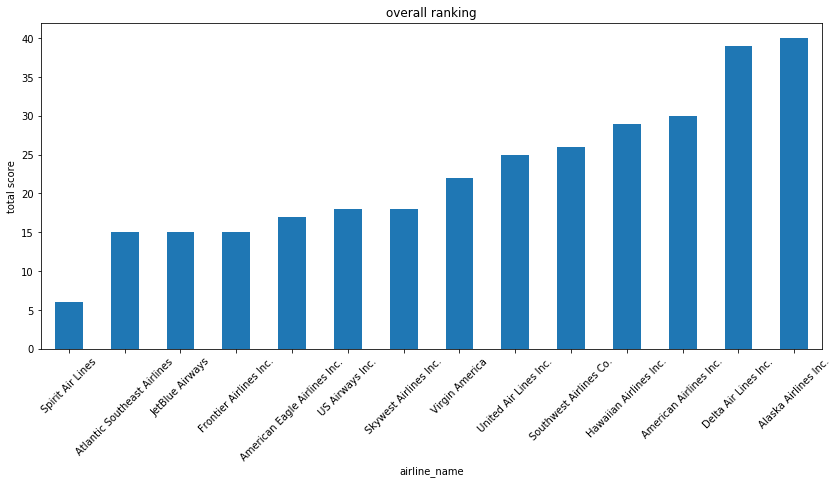

In [86]:
final_score.sort_values(['overall_score'],ascending = 1, inplace=True)
final_score['overall_score'].plot(kind='bar',figsize=(14,6),rot=45)
plt.ylabel('total score')
plt.title('overall ranking')


In [ ]:
########